In [1]:
%matplotlib widget 
import qubic.toolchain as tc
import qubic.rpc_client as rc
import qubitconfig.qchip as qc
from distproc.hwconfig import FPGAConfig, load_channel_configs
import numpy as np
import matplotlib.pyplot as plt
from chipcalibration import punchout as po
import chipcalibration.config as cfg
from importlib import reload

In [2]:
fpga_config = FPGAConfig(**{'fpga_clk_period': 2.e-9, 'alu_instr_clks': 5, 'jump_cond_clks': 5, 'jump_fproc_clks': 5, 'pulse_regwrite_clks': 3})

qchipname = 'X4Y2'
fpga_config, qchip, channel_config = cfg.load_configs(qchipname)
chanmap = {'Q0':7,'Q2':1,'Q1':4,'Q3':3,'Q4':5,'Q5':6,'Q6':2}


In [3]:
runner = rc.CircuitRunnerClient(ip='192.168.1.247')

In [4]:
qubits = ['Q0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7']
#qubit_dict = punchout.get_qubit_dict(qubits, qchip)
reload(po)
punchout = po.Punchout(qchip, fpga_config, channel_config, qubits, n_freq=300, freq_bandwidth=6.e6, atten_start=20, atten_stop=40, atten_step=1)
#s11 = punchout.run_punchout(qubit_dict, qchip, fpga_config, channel_config, runner)

In [10]:
punchout.run(runner)

OSError: [Errno 113] No route to host

Click any plot to select desired resonator attenuation and frequency. If this is not a resonator, click outside the plot to remove from config


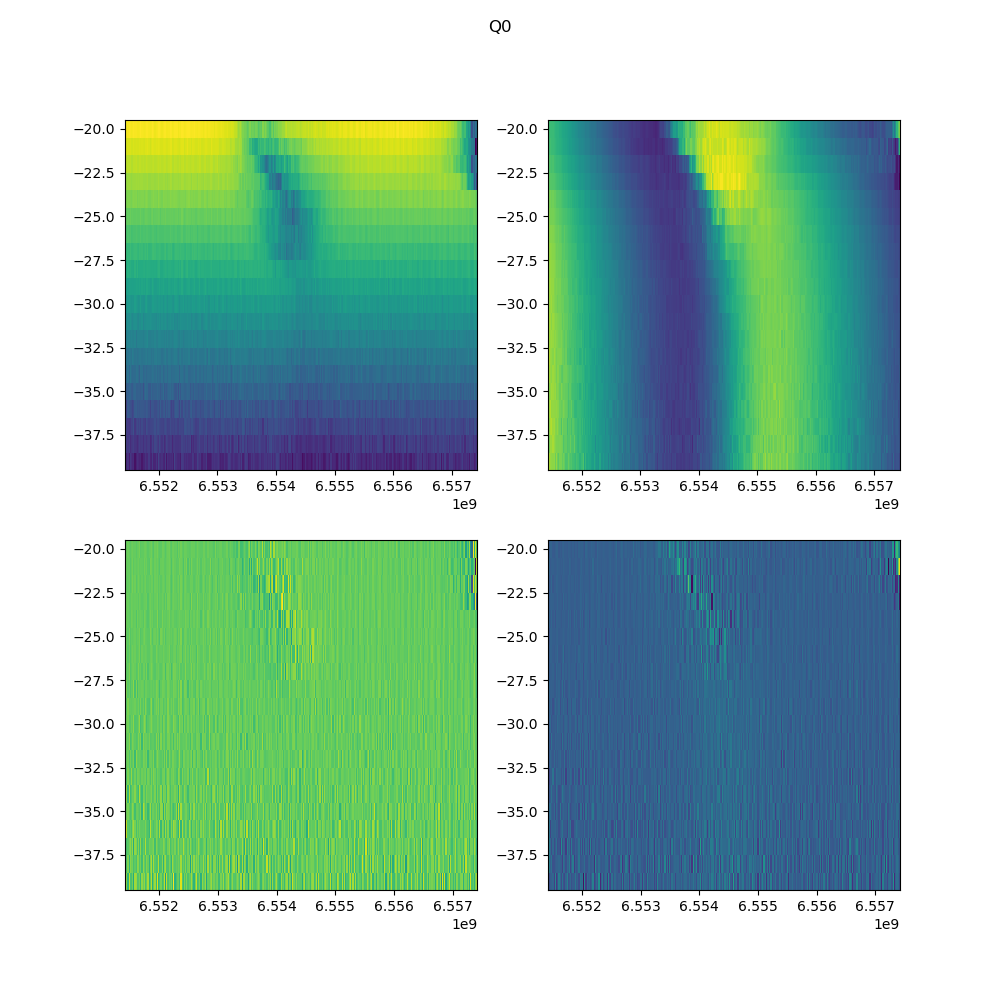

Click any plot to select desired resonator attenuation and frequency. If this is not a resonator, click outside the plot to remove from config


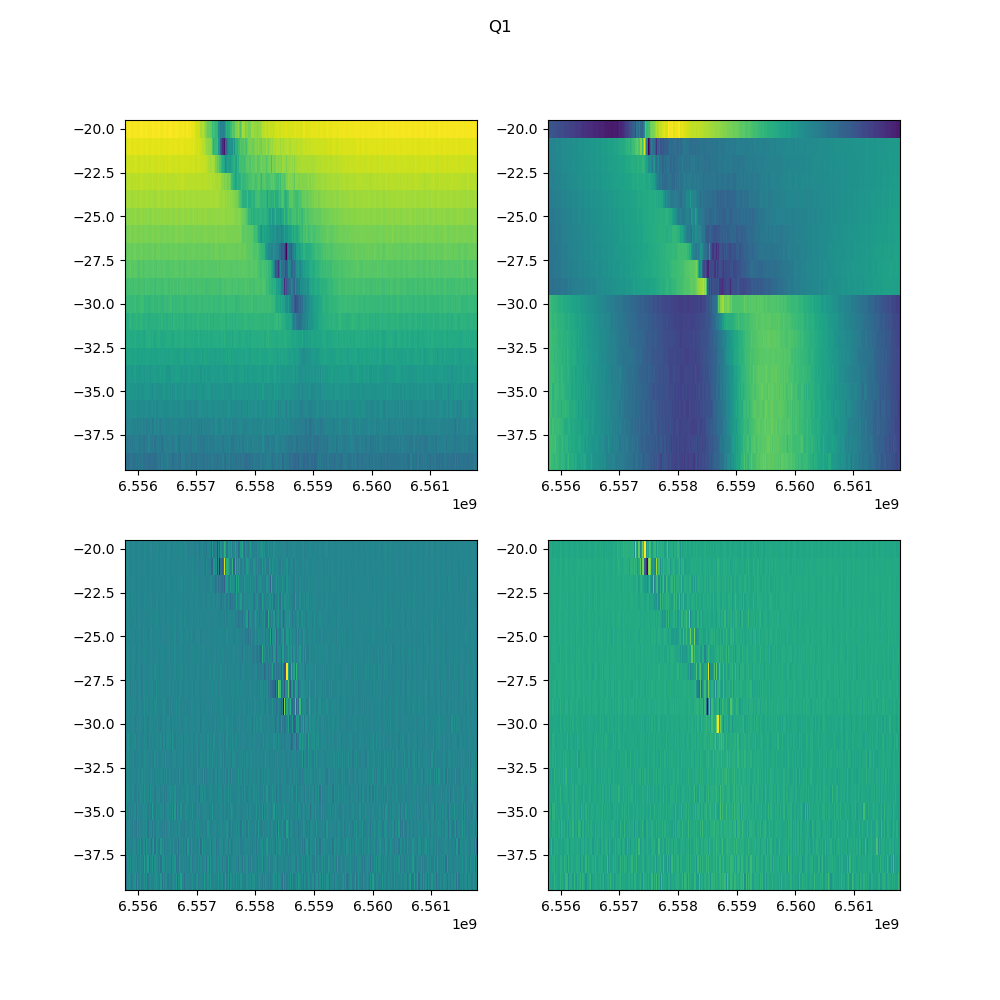

Click any plot to select desired resonator attenuation and frequency. If this is not a resonator, click outside the plot to remove from config


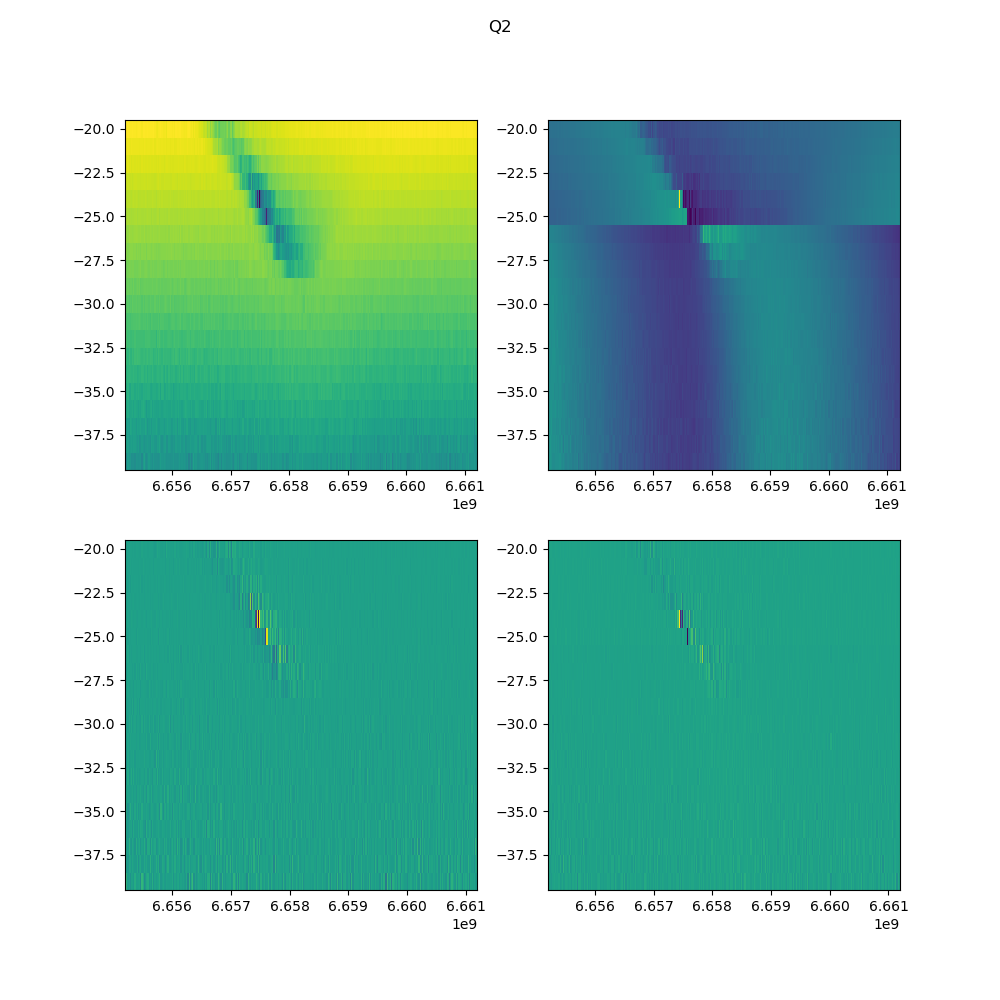

Click any plot to select desired resonator attenuation and frequency. If this is not a resonator, click outside the plot to remove from config


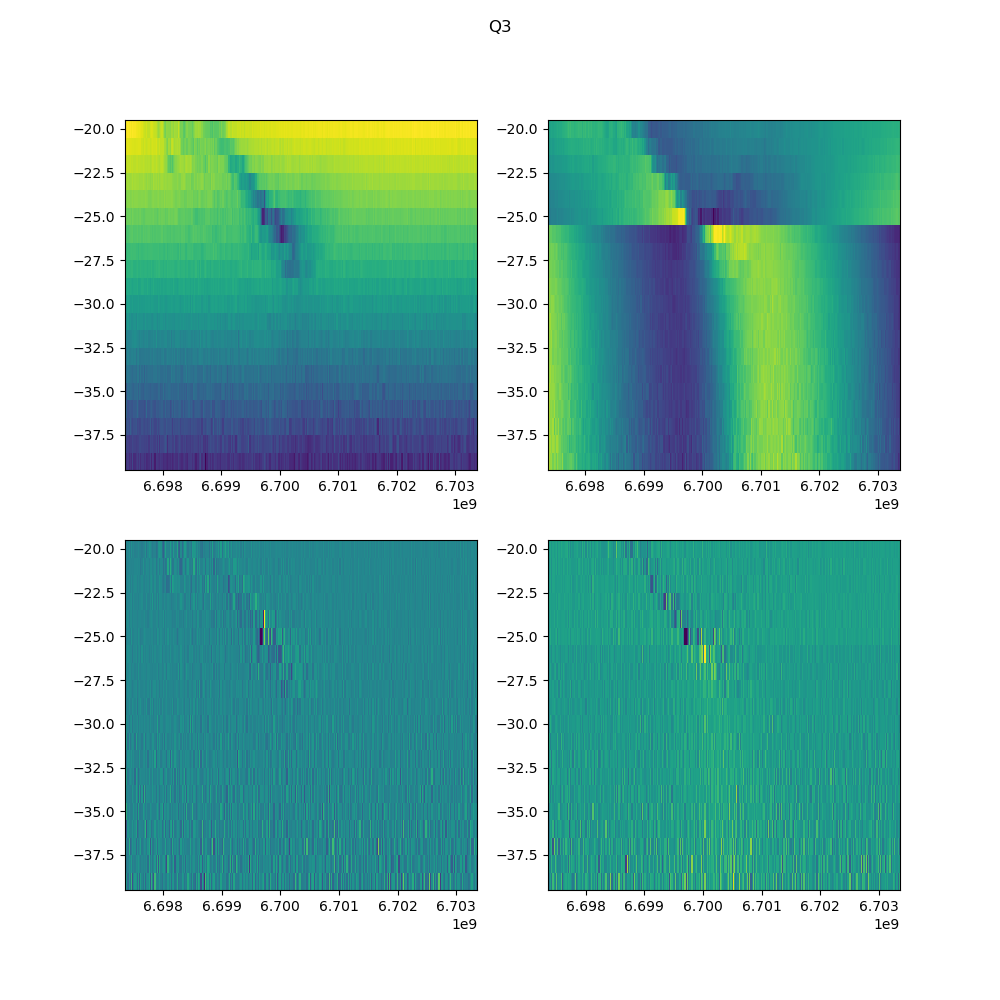

Click any plot to select desired resonator attenuation and frequency. If this is not a resonator, click outside the plot to remove from config


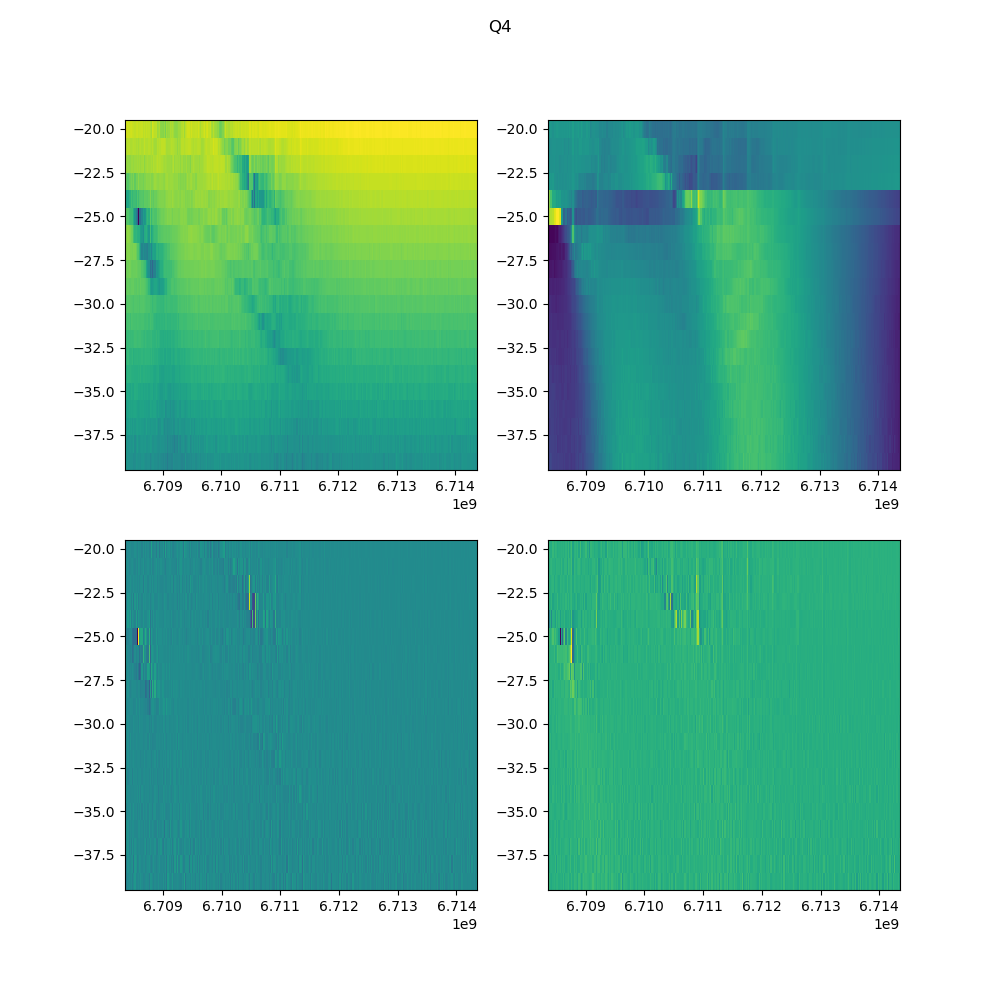

Click any plot to select desired resonator attenuation and frequency. If this is not a resonator, click outside the plot to remove from config


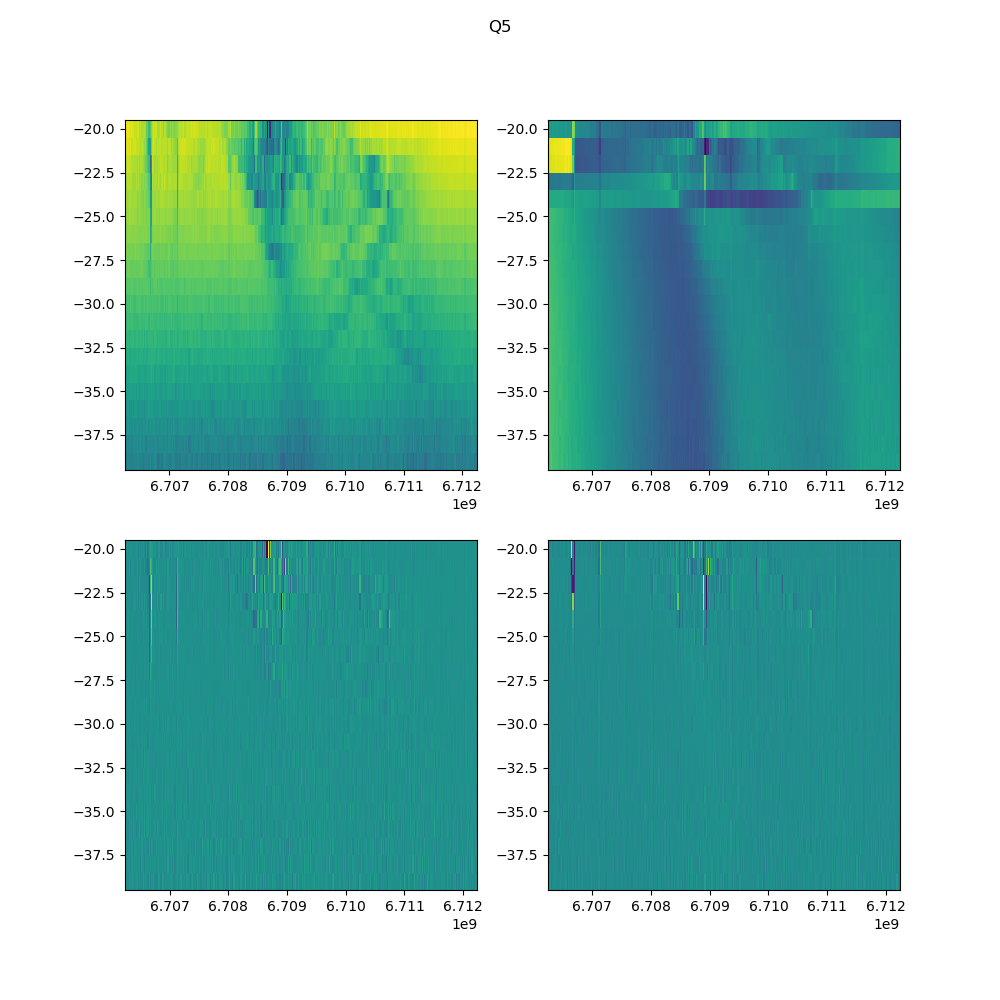

Click any plot to select desired resonator attenuation and frequency. If this is not a resonator, click outside the plot to remove from config


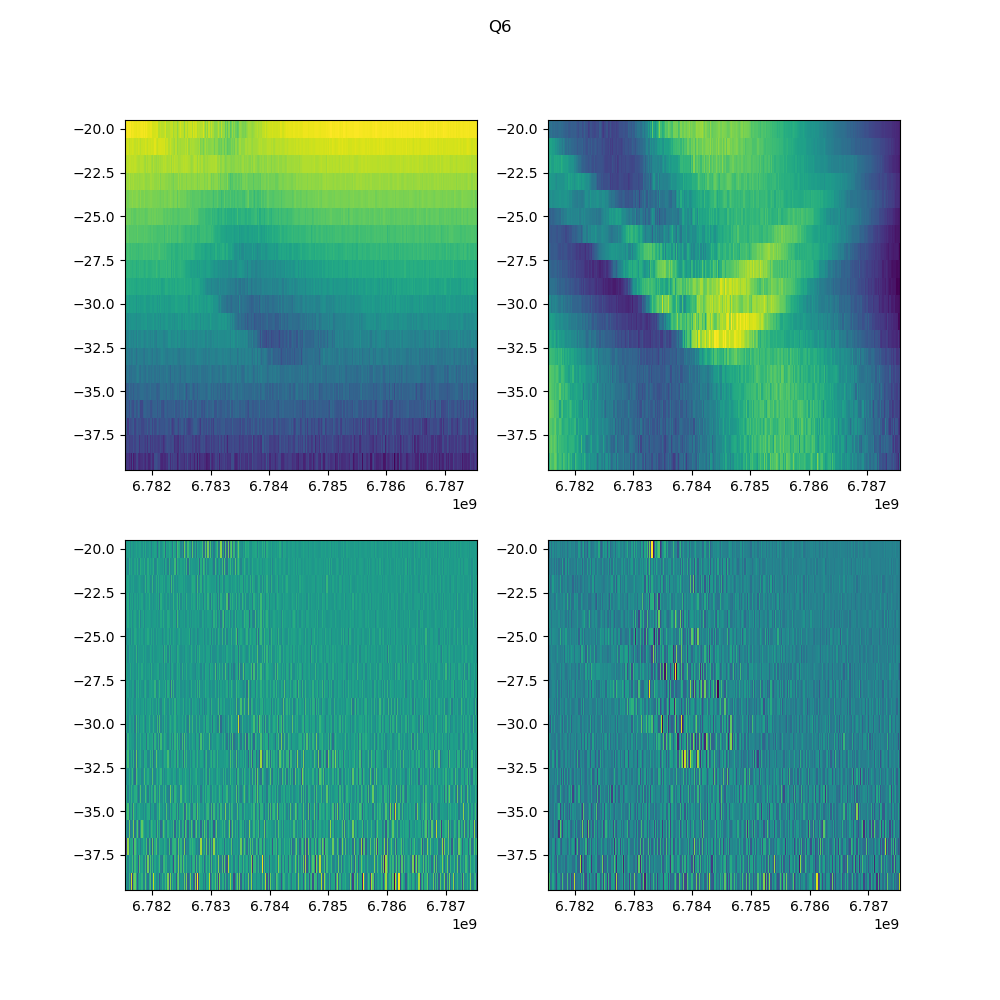

Click any plot to select desired resonator attenuation and frequency. If this is not a resonator, click outside the plot to remove from config


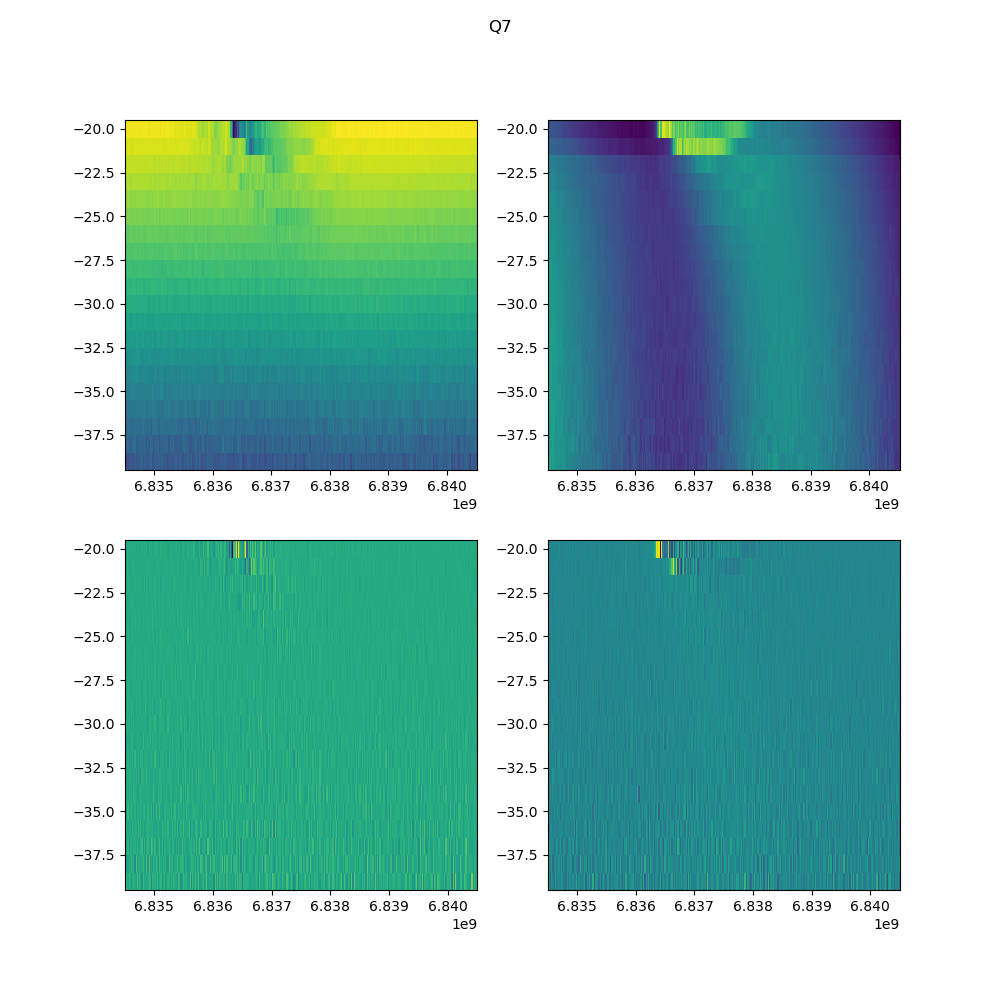

In [6]:
punchout.run_punchout_gui()

In [7]:
# when done clicking, grab values, print some out, then save and update qchip

punchout.get_calgui_vals()
punchout.optimal_atten

{'Q0': -34.120952497209814,
 'Q1': -34.44095197405133,
 'Q2': -34.075238037109365,
 'Q3': -33.36666695731026,
 'Q4': -36.943809291294635,
 'Q5': -34.17809535435267,
 'Q6': -36.38380911690847,
 'Q7': -32.81809517996651}

In [20]:
# when done clicking, grab values, print some out, then save and update qchip



In [8]:
punchout.update_qchip(qchip)

In [9]:
qchip.save('../chipcalibration/submodules/qchip/X4Y2/qubitcfg.json')

In [33]:
s11?

In [35]:
runner._pl_driver?

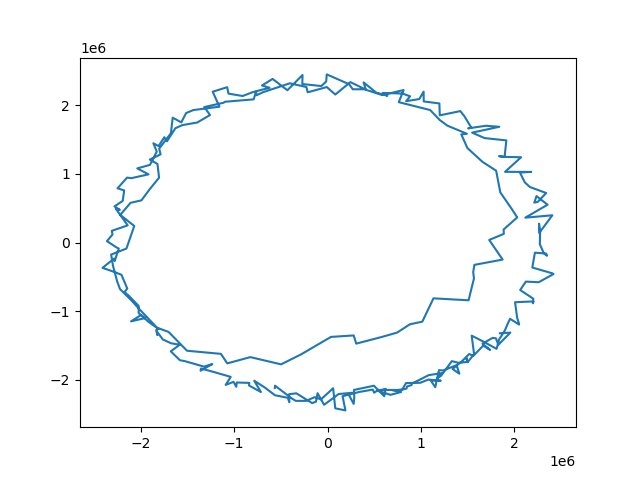

In [23]:
plt.figure()
plt.plot(np.real(punchout.s11['Q1'][10]), np.imag(punchout.s11['Q1'][10]))
plt.show()